In [573]:
import pandas as pd 
import numpy as np 
import pathlib as path
import matplotlib.pyplot as plt
import random
from PIL import Image
from random import sample
import statsmodels.api as sm
import os
from scipy.stats import binomtest
import scipy.stats as stats
import seaborn as sns


# Set the display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Disable wrapping to multiple lines


In [574]:
#define the relevant path to the current batch you wish to parse
project_name='multicategory_working_memory'
experiment_name='experiment 1'
qualification_method='loose' #or 'loose' or #'none' (will take the entire sample of participants that we have values for)

add_similarity_values=False #this adds the similarity of each image pair in the actuall experiment it takes some time (15 minutes)

model_name='VGG' #the only model we work with atm so dont change
PATH_TO_BATCH=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'collected data' 
PATH_TO_PROJECT=path.Path.cwd().parent.parent.parent / 'projects' / project_name 
PATH_TO_EXPERIMENT=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name
PATH_TO_OUTPUTS=path.Path.cwd().parent.parent.parent / 'projects' / project_name / experiment_name / 'figures and outputs' 
if PATH_TO_BATCH.exists():
    print('batch folder found at:\n' ,PATH_TO_BATCH)
else: 
    print('path to batch is non existent:\n',PATH_TO_BATCH)

batch folder found at:
 /Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data


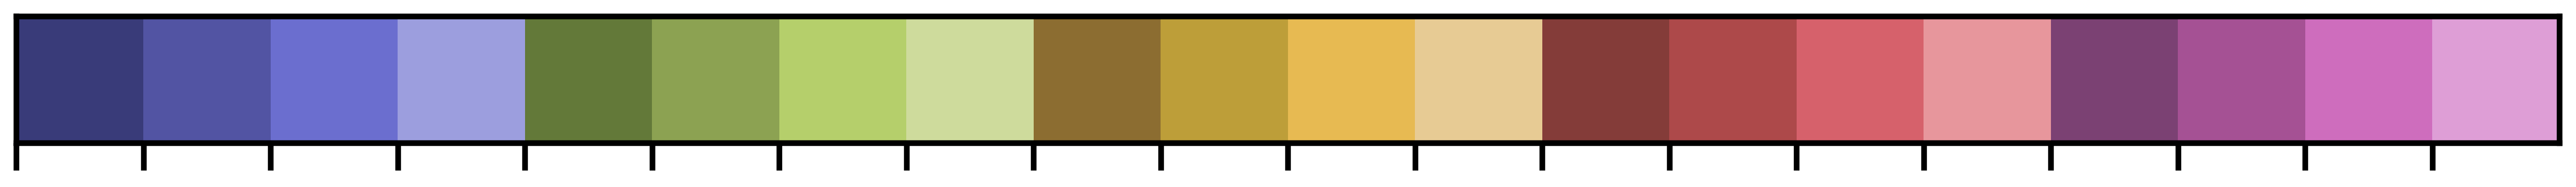

In [575]:
params = {
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'font.size': 36,
    'axes.labelsize': 40,
    'axes.titlesize': 40,
    'xtick.labelsize': 36,
    'ytick.labelsize': 36,
    'legend.fontsize': 40,
    'lines.linewidth': 4,
    'figure.figsize': (30, 30),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'svg',
    'savefig.bbox': 'tight'
}
plt.rcParams.update(params)

# Set Seaborn parameters
sns.set_context("poster", font_scale=1.0)
sns.set_palette('tab20b')

# Plot the color palette
sns.palplot(sns.color_palette())

# Choose a color from the palette
my_color = sns.color_palette()[2]

# Show the plot
plt.show()

In [576]:
all_directories_paths_working_memory = [x[0] for x in os.walk(PATH_TO_BATCH) if ('batch' in x[0].split('\\')[-1]) and ('data'  not in x[0].split('/')[-1])]

#delete the following rows once batch 2 is actually filled with data and processed. 
all_directories_paths_working_memory

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 4',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory_working_memory/experiment 1/collected data/pilot_same_day/batch 2']

In [577]:

if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_working_memory = pd.DataFrame([])
for batch in all_directories_paths_working_memory:
    time_gap = 'working_memory'
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_working_memory = pd.concat([all_valid_subjects_working_memory,file])

In [578]:
print(f'there are {len(all_valid_subjects_working_memory.index) - len(set(all_valid_subjects_working_memory.index))}, duplicate subjects')

there are 0, duplicate subjects


In [579]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets]
  # Connect each pair of points from the same row with a line
  for bar_ind in np.arange(0,len(x_offsets_arrays)-1):
    for i in range(len(x_offsets_arrays[0])):
      ax.plot([x_offsets_arrays[bar_ind][i], x_offsets_arrays[bar_ind+1][i]], [y_offsets_arrays[bar_ind][i], y_offsets_arrays[bar_ind+1][i]], color="gray", alpha=0.75)

/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)
/Users/edenzohar/Thesis/visual_memory_representation_final/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


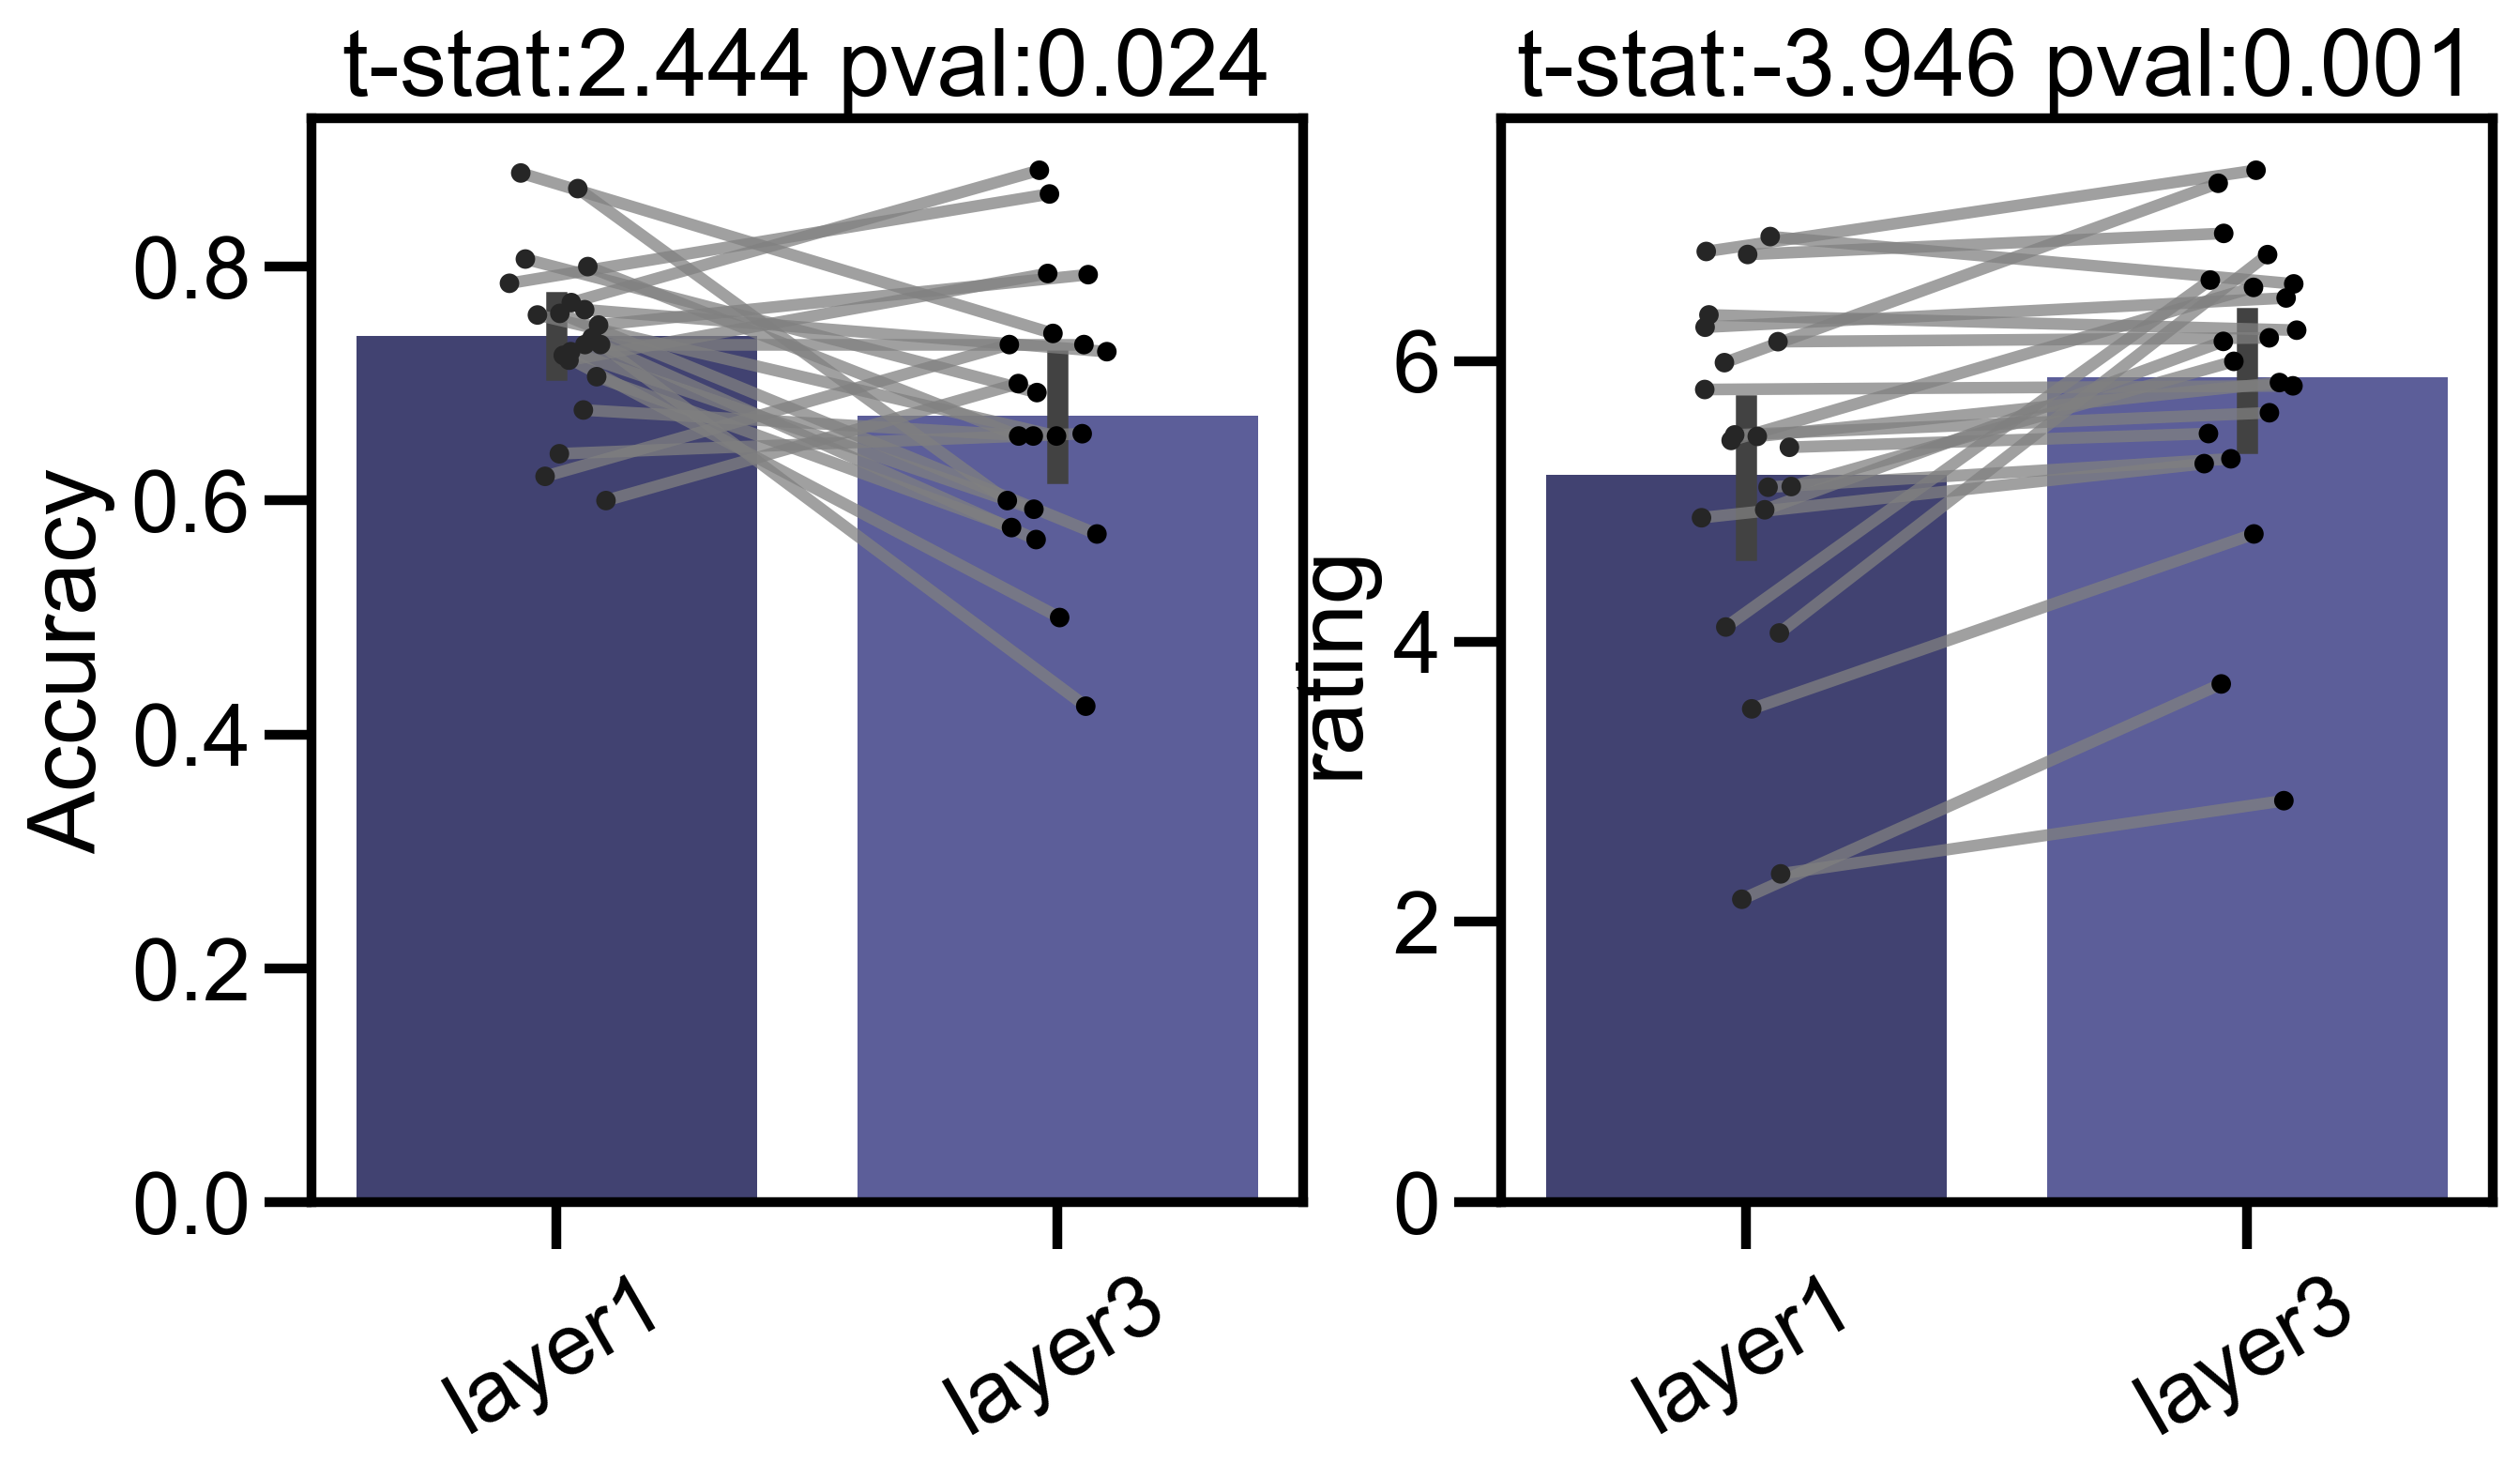

In [580]:

d1 = all_valid_subjects_working_memory['level_1_accuracy']
d2 = all_valid_subjects_working_memory['level_3_accuracy']
t_stat, p_value = stats.ttest_rel(d1, d2)


fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.barplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0])
handel1 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_accuracy','level_3_accuracy']],ax=axes[0],color='k')

axes[0].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[0].set_ylabel('Accuracy')
axes[0].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')

sns.barplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],ax = axes[1])
handel2 = sns.stripplot(data=all_valid_subjects_working_memory[['level_1_rating','level_3_rating']],color='k',ax = axes[1])


d1 = all_valid_subjects_working_memory['level_1_rating']
d2 = all_valid_subjects_working_memory['level_3_rating']
t_stat, p_value = stats.ttest_rel(d1, d2)

axes[1].set_xticklabels(labels=['layer1','layer3'],rotation=30)
axes[1].set_ylabel('rating')
axes[1].set_title(f't-stat:{t_stat:.3f} pval:{p_value:.3f}')


add_connecting_lines_to_stripplot(handel1,axes[0])
add_connecting_lines_to_stripplot(handel2,axes[1])

In [581]:
all_valid_subjects_working_memory['worker_ID'] = all_valid_subjects_working_memory.index
rt_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_rt','level_3_rt'],var_name='layer')
accuracy_df = pd.melt(all_valid_subjects_working_memory,id_vars=['worker_ID'],value_vars=['level_1_accuracy','level_3_accuracy'],var_name='layer')

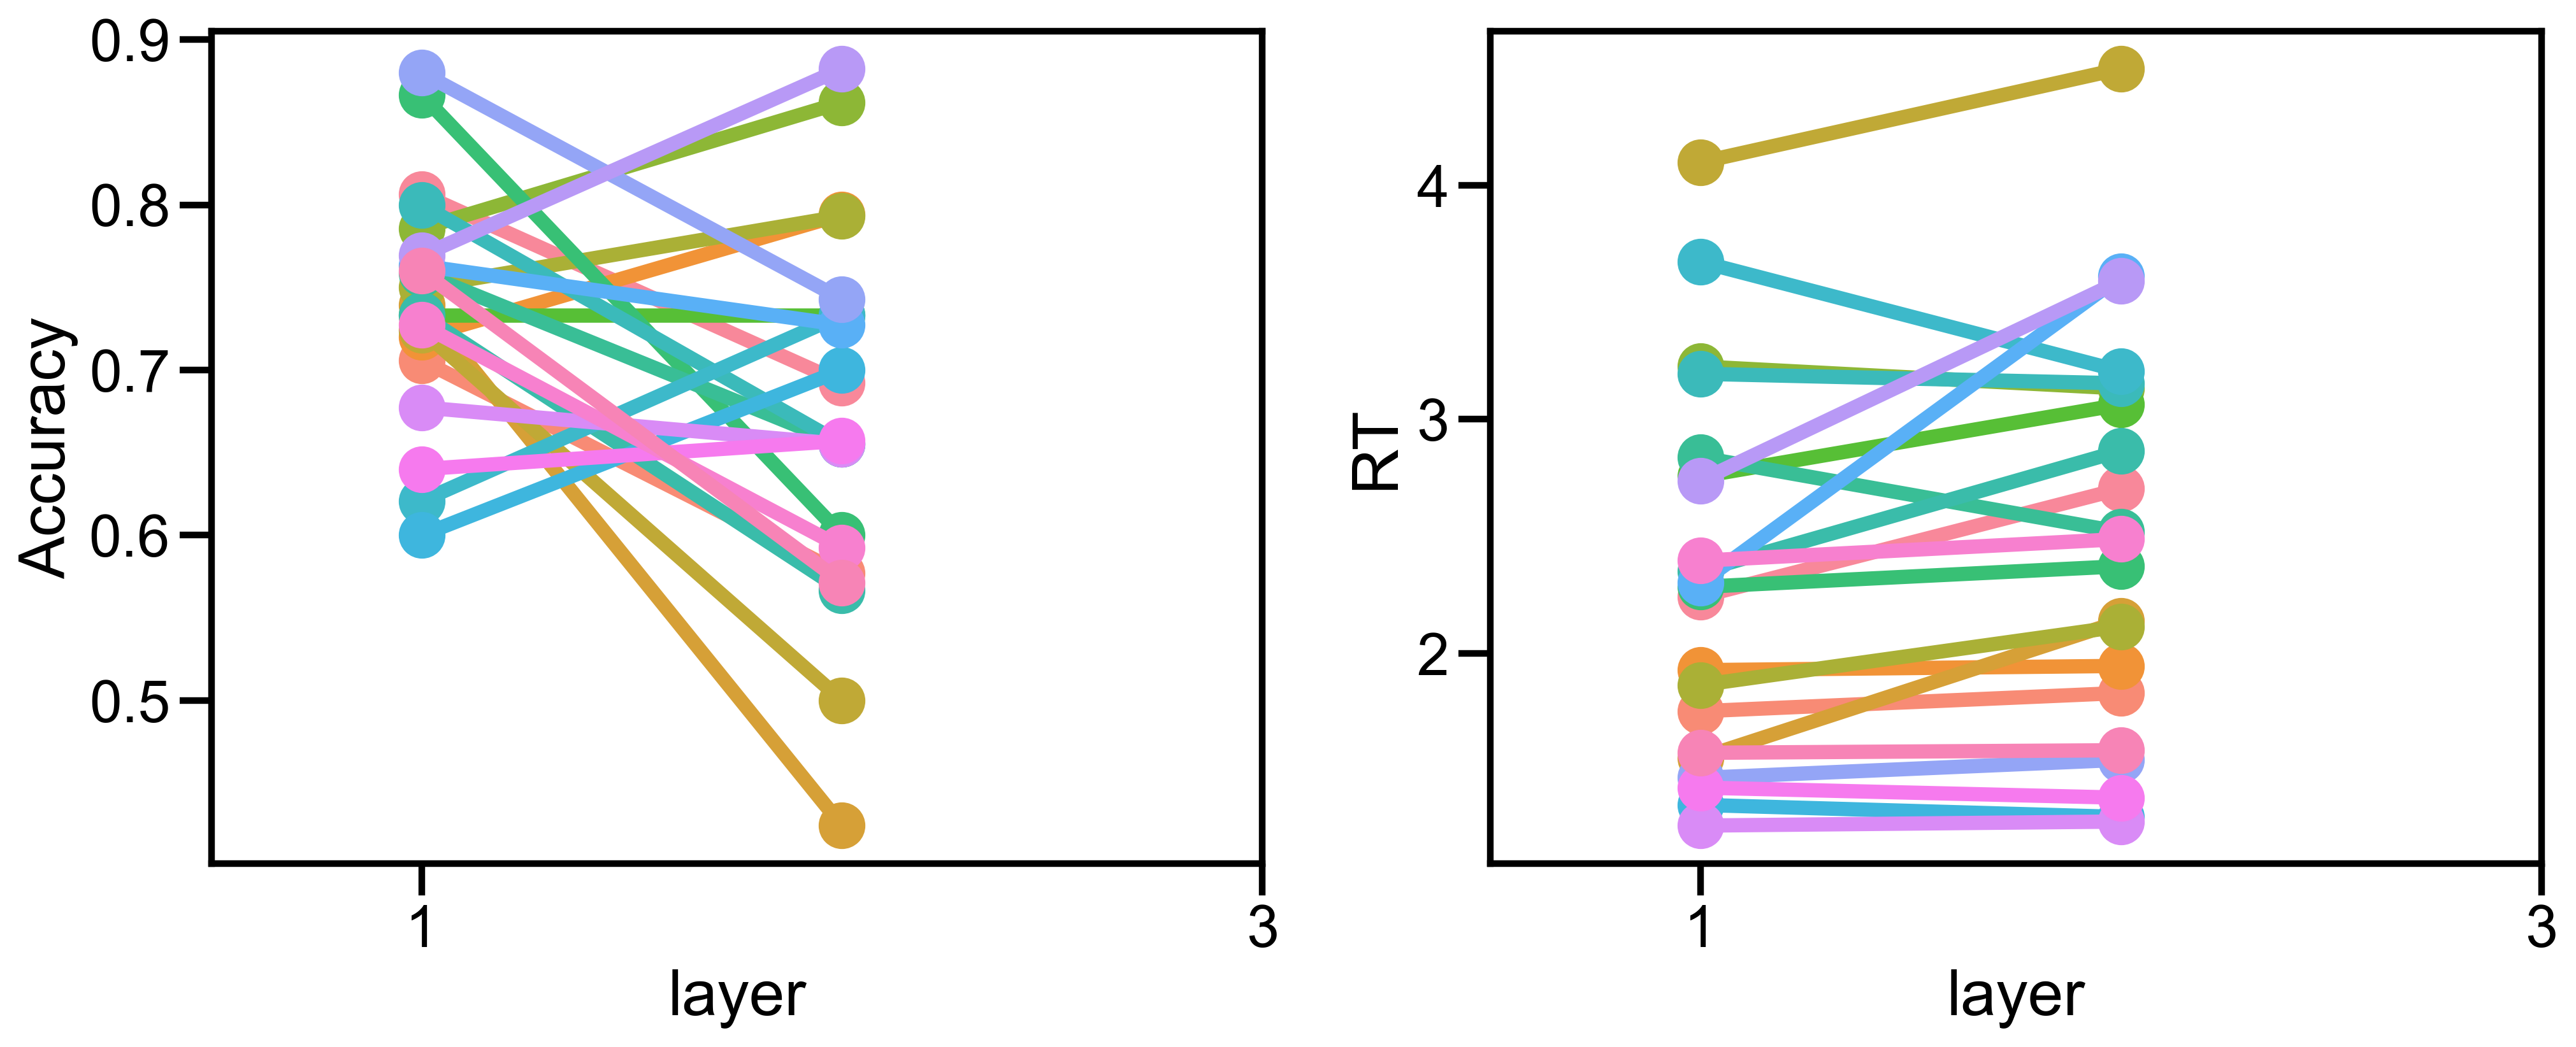

In [582]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(14,6),sharex=True,sharey=False)
#accuracy: 
G = sns.pointplot(data=accuracy_df,x='layer', y='value', hue='worker_ID', ax=axes[0])
plt.xticks([0,2],['1','3'])
axes[0].set_ylabel('Accuracy')
axes[0].get_legend().remove() 

#rt: 
sns.pointplot(data=rt_df,x='layer', y='value', hue='worker_ID', ax=axes[1])
plt.xticks([0,2],['1','3'])
plt.ylabel('RT')
axes[1].get_legend().remove() 
plt.tight_layout()

## concatanate the working memory data with the same day and 24 hours data

In [583]:
PATH_TO_NON_WORKING_MEMORY_TIME_GAPS =path.Path.cwd().parent.parent.parent / 'projects' / 'multicategory' / 'experiment 1' 
all_directories_paths_long_term_memory = [x[0] for x in os.walk(PATH_TO_NON_WORKING_MEMORY_TIME_GAPS) if ('batch' in x[0].split('\\')[-1]) and ('data'  not in x[0].split('/')[-1])]
all_directories_paths_long_term_memory

['/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_same_day/batch 2',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 1',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 3',
 '/Users/edenzohar/Thesis/visual_memory_representation_final/projects/multicategory/experiment 1/collected data/pilot_24_hours/batch 2']

In [584]:
if qualification_method=='none':
    filename = 'one_line_per_participant_all_info_all_subject_strict.csv' #note that why i do use the "strict" its irrelevant as all_subjects includes all of th em and not just qualified so criterion is irrelevant for this line
elif qualification_method in ['strict','loose']:
    filename = 'one_line_per_participant_all_info_valid_subjects_only_'+qualification_method+'.csv'
else: 
    raise Exception(f'the qualification method choosen {qualification_method} is invalid')

all_valid_subjects_non_working_memory = pd.DataFrame([])
for batch in all_directories_paths_long_term_memory:
    time_gap = path.Path(batch).parent.name
    PATH_PROCESED = batch/path.Path(filename)
    file = pd.read_csv(PATH_PROCESED,index_col=0)
    file['time_gap'] = time_gap
    file['worker_ID'] = file.index 
    file['batch_number'] = int(path.Path(batch).name.split(' ')[-1])
    
    all_valid_subjects_non_working_memory = pd.concat([all_valid_subjects_non_working_memory,file])

In [585]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    42
Name: count, dtype: int64

## remove duplicate subjects in same day / 24 hours 

In [586]:
print(f'there are {len(all_valid_subjects_non_working_memory.index) - len(set(all_valid_subjects_non_working_memory.index))}, duplicate subjects')

there are 2, duplicate subjects


In [587]:
all_valid_subjects_non_working_memory.index.value_counts()

AEK2SAEL9GG39     2
A39KMTFHRJJASK    2
A2UWEAIX8UZXAQ    1
AW07POT8ABE05     1
AC01SVLHOB6HN     1
                 ..
A394S7JSNUA3TS    1
AZNIEFUIVB2H0     1
A1VXAJIELTYK0     1
A3CGQOJC28OVGN    1
A2J9NFY45NKR2N    1
Name: count, Length: 84, dtype: int64

In [588]:
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'AEK2SAEL9GG39') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]
all_valid_subjects_non_working_memory = all_valid_subjects_non_working_memory[~((all_valid_subjects_non_working_memory['worker_ID'] == 'A39KMTFHRJJASK') & (all_valid_subjects_non_working_memory['time_gap'] == 'pilot_24_hours')) ]

In [589]:
n_24_hours= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_valid_subjects_non_working_memory['time_gap'].value_counts()['pilot_same_day']

all_valid_subjects_non_working_memory['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
Name: count, dtype: int64

## concatanate data from working memroy and previous time gaps 

In [590]:
long_term_memory_cols = {'testing_layer_1_accuracy':'level_1_accuracy',
                         'testing_layer_1_rt':'level_1_rt',
                         'testing_layer_1_rating':'level_1_rating', 

                         'testing_layer_3_accuracy':'level_3_accuracy',
                         'testing_layer_3_rt':'level_3_rt',
                         'testing_layer_3_rating':'level_3_rating', 

                         'testing_longest_response_strike':'longest_response_strike',
                         'testing_rating_mean':'rating_mean',
                         'testing_rating_varience': 'rating_varience',
                         'testing_RT_overall_mean': 'RT_overall_mean',
                         'testing_Test_overall_accuracy':'Test_overall_accuracy'


                         }

all_valid_subjects_non_working_memory.rename(columns=long_term_memory_cols,inplace=True)
all_valid_subjects_non_working_memory

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_rating_varience,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,Test_overall_accuracy,RT_overall_mean,rating_varience,rating_mean,level_1_rating,level_3_rating,testing_RT_incorrect_mean,testing_RT_correct_mean,level_1_rt,level_1_accuracy,level_3_rt,level_3_accuracy,longest_response_strike,time_gap,worker_ID,batch_number
A17K1CHOI773VZ,1.3138,1.0,0.666667,3.189917,1.834848,2.376300,3.596725,1.34020,1.0,0.733333,5.368782,2.045803,4.466667,4.033333,4.900000,7.745687,4.504452,4.506480,0.833333,6.231083,0.633333,4.0,pilot_same_day,A17K1CHOI773VZ,1
AMHUDJ44HF1ZH,0.7300,1.0,0.500000,2.712833,4.381780,2.982133,2.443533,0.69402,1.0,0.816667,2.433175,1.806767,6.700000,6.033333,7.366667,2.643782,2.385896,2.360230,0.733333,2.506120,0.900000,4.0,pilot_same_day,AMHUDJ44HF1ZH,1
AGOBQY50VQ7VX,1.1111,1.0,0.500000,3.341400,0.516398,1.598633,5.084167,1.04190,1.0,0.816667,2.228652,1.676019,6.733333,6.733333,6.733333,2.623264,2.140065,2.084323,0.833333,2.372980,0.800000,6.0,pilot_same_day,AGOBQY50VQ7VX,1
A23J0G72AUTS1I,1.3290,1.0,0.333333,12.004650,2.338090,16.544175,2.925600,1.05904,1.0,0.783333,2.873752,1.619444,6.433333,6.666667,6.200000,2.319831,3.026964,2.111473,0.900000,3.636030,0.666667,3.0,pilot_same_day,A23J0G72AUTS1I,1
ATPW1MWLW7RBL,1.0961,1.0,1.000000,2.207467,1.471960,NaN,2.207467,1.20210,1.0,0.800000,1.833232,1.904500,6.000000,5.966667,6.033333,1.952917,1.803310,1.759800,0.833333,1.906663,0.766667,9.0,pilot_same_day,ATPW1MWLW7RBL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A2F48NO7AD9VKK,0.6011,1.0,0.333333,3.500517,0.408248,4.163150,2.175250,0.54320,1.0,0.716667,3.422595,1.511818,3.550000,3.366667,3.733333,3.469447,3.404072,3.646127,0.633333,3.199063,0.800000,5.0,pilot_24_hours,A2F48NO7AD9VKK,2
A19AYB3M3IIP51,1.7267,1.0,0.500000,3.909700,1.211060,4.775133,3.044267,2.05958,1.0,0.716667,3.391918,1.345740,5.950000,5.866667,6.033333,5.714918,4.331965,3.696518,0.733333,3.097821,0.700000,4.0,pilot_24_hours,A19AYB3M3IIP51,2
A1BQLX0A4W8A8,0.9829,1.0,0.500000,6.063083,0.983192,7.433300,4.692867,0.89338,1.0,0.600000,1.887316,0.581251,7.366667,7.366667,7.366667,3.688963,2.290708,1.585567,0.666667,2.210618,0.533333,4.0,pilot_24_hours,A1BQLX0A4W8A8,2
A1ABRVTR49OA73,1.5819,1.0,0.333333,4.368667,0.547723,4.043525,5.018950,0.99810,0.8,0.633333,1.366347,0.770025,7.516667,7.266667,7.766667,1.293800,3.381529,1.300333,0.733333,1.434638,0.533333,3.0,pilot_24_hours,A1ABRVTR49OA73,2


In [591]:
all_subjects_working_memory_and_time_gaps = pd.concat([all_valid_subjects_non_working_memory,all_valid_subjects_working_memory])

# remove duplicate values working memory - long term memory 

In [592]:
all_subjects_working_memory_and_time_gaps['worker_ID'].value_counts()

worker_ID
ANDJL5986AUAF     2
A3V2XCDF45VN9X    2
A17K1CHOI773VZ    1
A237PUN7791D62    1
A2NC28XJKAFJV     1
                 ..
A2GE831IS8US6K    1
A39KMTFHRJJASK    1
A13WTEQ06V3B6D    1
A3E8SXH0BAYG85    1
A3VVCPYZROGGJZ    1
Name: count, Length: 103, dtype: int64

In [593]:
all_subjects_working_memory_and_time_gaps[all_subjects_working_memory_and_time_gaps['worker_ID']== 'A3V2XCDF45VN9X']

,demo_arrow_rt,demo_arrow_correct,demo_demo_accuracy,demo_RT_overall_mean,demo_rating_varience,demo_RT_incorrect_mean,demo_RT_correct_mean,encoding_arrow_mean_rt,encoding_arrow_accuracy,Test_overall_accuracy,RT_overall_mean,rating_varience,rating_mean,level_1_rating,level_3_rating,testing_RT_incorrect_mean,testing_RT_correct_mean,level_1_rt,level_1_accuracy,level_3_rt,level_3_accuracy,longest_response_strike,time_gap,worker_ID,batch_number,subject
A3V2XCDF45VN9X,0.8996,1.0,0.333333,2.1056,1.095445,2.19165,1.9335,1.04252,1.0,0.683333,1.666748,1.653194,4.250000,4.100000,4.400000,1.5794,1.707227,1.662333,0.766667,1.671163,0.6,5.0,pilot_same_day,A3V2XCDF45VN9X,2,NaN
A3V2XCDF45VN9X,NaN,NaN,1.000000,2.0987,NaN,NaN,NaN,NaN,NaN,0.650000,1.326462,1.336270,5.201136,5.099822,5.302451,NaN,NaN,1.352210,0.600000,1.300713,0.7,3.0,working_memory,A3V2XCDF45VN9X,3,A3V2XCDF45VN9X


In [594]:
all_subjects_working_memory_and_time_gaps = all_subjects_working_memory_and_time_gaps[~((all_subjects_working_memory_and_time_gaps['worker_ID'] == 'ANDJL5986AUAF') & (all_subjects_working_memory_and_time_gaps['time_gap'] == 'working_memory')) ]
all_subjects_working_memory_and_time_gaps = all_subjects_working_memory_and_time_gaps[~((all_subjects_working_memory_and_time_gaps['worker_ID'] == 'A3V2XCDF45VN9X') & (all_subjects_working_memory_and_time_gaps['time_gap'] == 'working_memory')) ]

In [595]:
renameing_dict = {'level_1_rating':'low_level_rating',
            'level_3_rating':'high_level_rating',
            'level_1_accuracy':'low_level_accuracy',
            'level_3_accuracy':'high_level_accuracy',
            'level_1_rt':'low_level_rt',
            'level_3_rt':'high_level_rt',
            'testing_RT_correct_mean':'RT_correct_mean',
            'testing_RT_incorrect_mean':'RT_incorrect_mean',
            'Test_overall_accuracy' : 'overall_accuracy'
}
all_subjects_working_memory_and_time_gaps.rename(columns=renameing_dict,inplace=True)

In [596]:
n_24_hours= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_24_hours']
n_same_day= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['pilot_same_day']
n_working_memory= all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()['working_memory']


all_subjects_working_memory_and_time_gaps['time_gap'].value_counts()

time_gap
pilot_same_day    44
pilot_24_hours    40
working_memory    19
Name: count, dtype: int64

In [597]:
all_subjects_working_memory_and_time_gaps.to_csv(PATH_TO_EXPERIMENT / ('all_data_working_memory_and_long_term_'+qualification_method+' .csv'),index=False,)

In [598]:
#create long format dataframes for accuracy and rt seperately
rt_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rt','high_level_rt'],var_name='layer')
accuracy_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_accuracy','high_level_accuracy'],var_name='layer')
rating_df = pd.melt(all_subjects_working_memory_and_time_gaps,id_vars=['worker_ID','time_gap'],value_vars=['low_level_rating','high_level_rating'],var_name='layer')

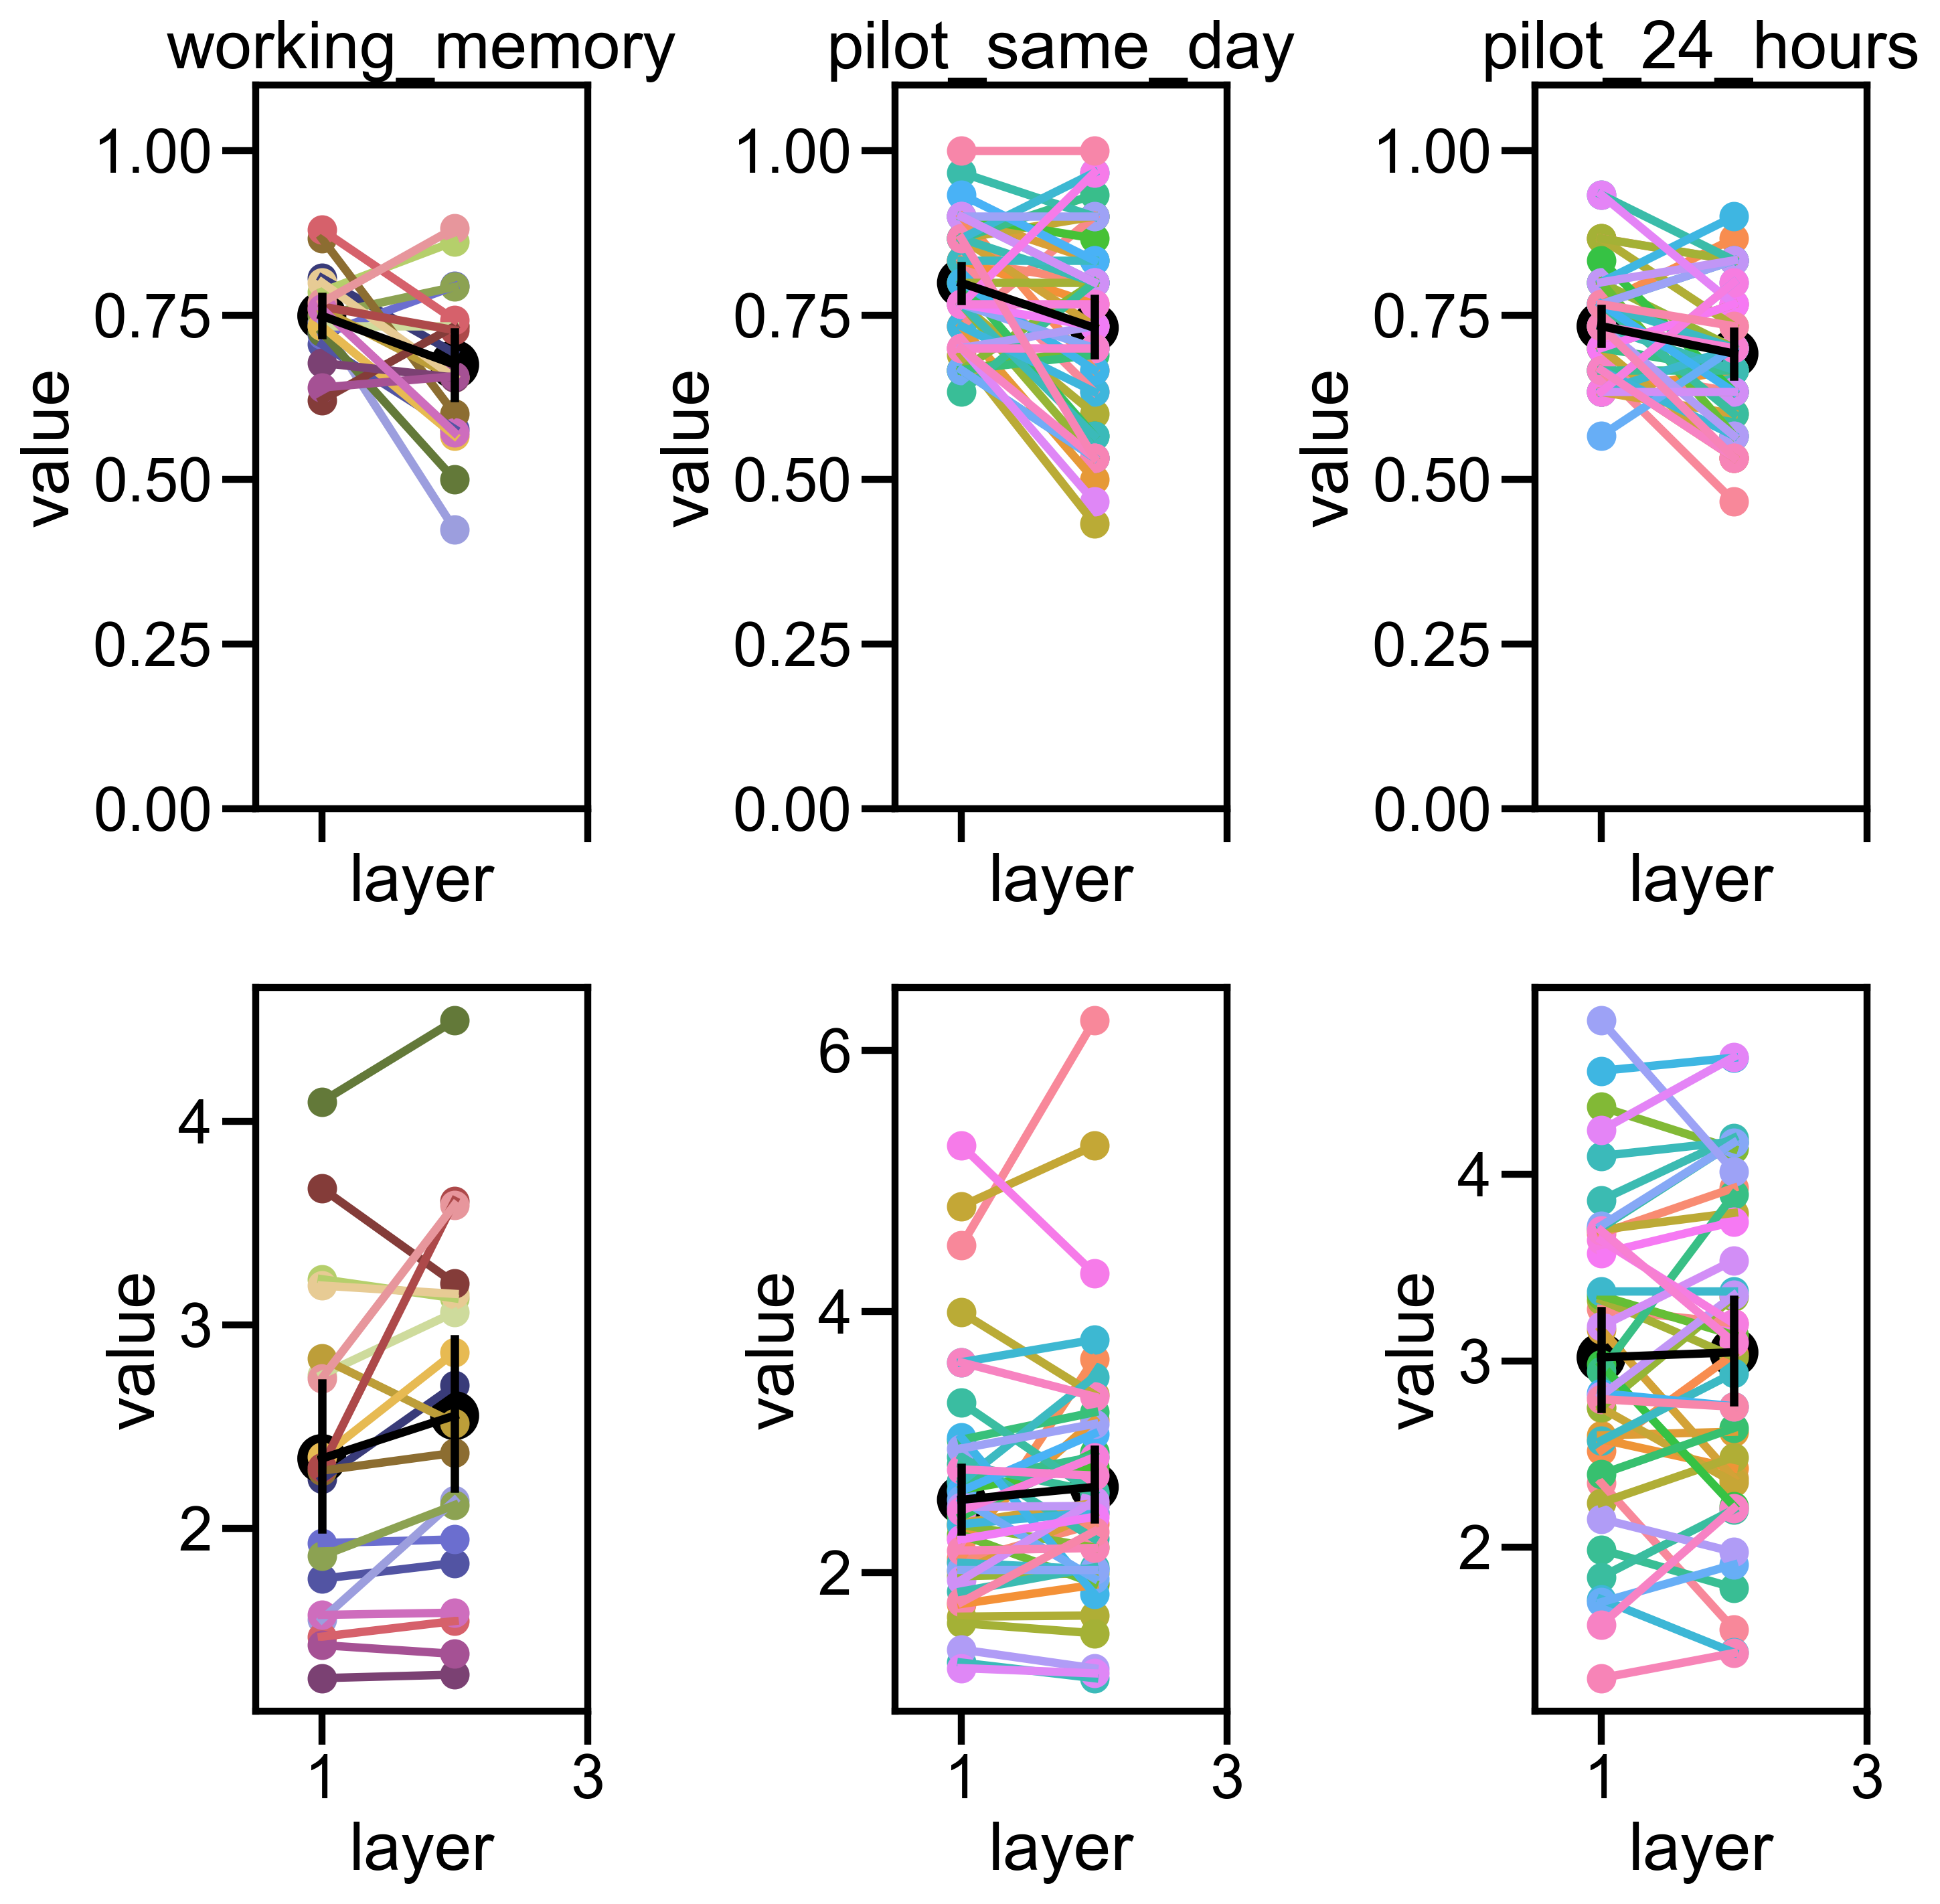

In [599]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(10,10),sharex=True,sharey=False)
my_order = ['working_memory','pilot_same_day','pilot_24_hours']
for i,curtime in enumerate(my_order):
    #accuracy: 
    g=sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[0,i], scale = 0.6)
    plt.setp(axes[0,i].lines, zorder=100, linewidth=3)
    axes[0,i].set_ylim([0,1.1])
    sns.pointplot(data=accuracy_df[accuracy_df['time_gap']==curtime],x='layer', y='value',ax=axes[0,i],color='black',scale=1)
    plt.setp(axes[0,i].lines, zorder=200, linewidth=3)
    axes[0,i].get_legend().remove() 
    axes[0,i].set_title(curtime)
    #rt: 
    g=sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value', hue='worker_ID', ax=axes[1,i], scale = 0.6)
    plt.setp(axes[1,i].lines, zorder=100, linewidth=3)
    sns.pointplot(data=rt_df[rt_df['time_gap']==curtime],x='layer', y='value',ax=axes[1,i],color='black',scale=1)
    plt.setp(axes[1,i].lines, zorder=200, linewidth=3)
    plt.xticks([0,2],['1','3'])
    axes[1,i].get_legend().remove()

plt.tight_layout()
fig.savefig(PATH_TO_EXPERIMENT / ('line_graphs_per_condition_in_seperate_subplots_'+qualification_method+'.svg'))


In [600]:
def add_connecting_lines_to_stripplot(stripplot_handle,ax):
  #get the current offsets:
  paths = stripplot_handle.collections
  #get x offsets:
  x_offsets = [path.get_offsets()[:,0] for path in paths if len(path.get_offsets()[:,0])>0]
  x_offsets_arrays=[np.array(offsets) for offsets in x_offsets]
  #get y offsets:
  y_offsets = [path.get_offsets()[:,1] for path in paths  if len(path.get_offsets()[:,1])>0]
  y_offsets_arrays=[np.array(offsets) for offsets in y_offsets ]
  # Connect each pair of points from the same row with a line
  for i in range(len(x_offsets_arrays[0])):
    ax.plot([x_offsets_arrays[0][i], x_offsets_arrays[0+1][i]], [y_offsets_arrays[0][i], y_offsets_arrays[0+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  for i in range(len(x_offsets_arrays[2])):
    ax.plot([x_offsets_arrays[2][i], x_offsets_arrays[2+1][i]], [y_offsets_arrays[2][i], y_offsets_arrays[2+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

  # this is an additions for when there are 3 bars to plot (3 time gaps) 3 bars with 2 subbars 
  if len(x_offsets_arrays) == 6:
    for i in range(len(x_offsets_arrays[4])):
      ax.plot([x_offsets_arrays[4][i], x_offsets_arrays[4+1][i]], [y_offsets_arrays[4][i], y_offsets_arrays[4+1][i]], color="black", alpha=0.75,linestyle='dashed',linewidth=0.5)

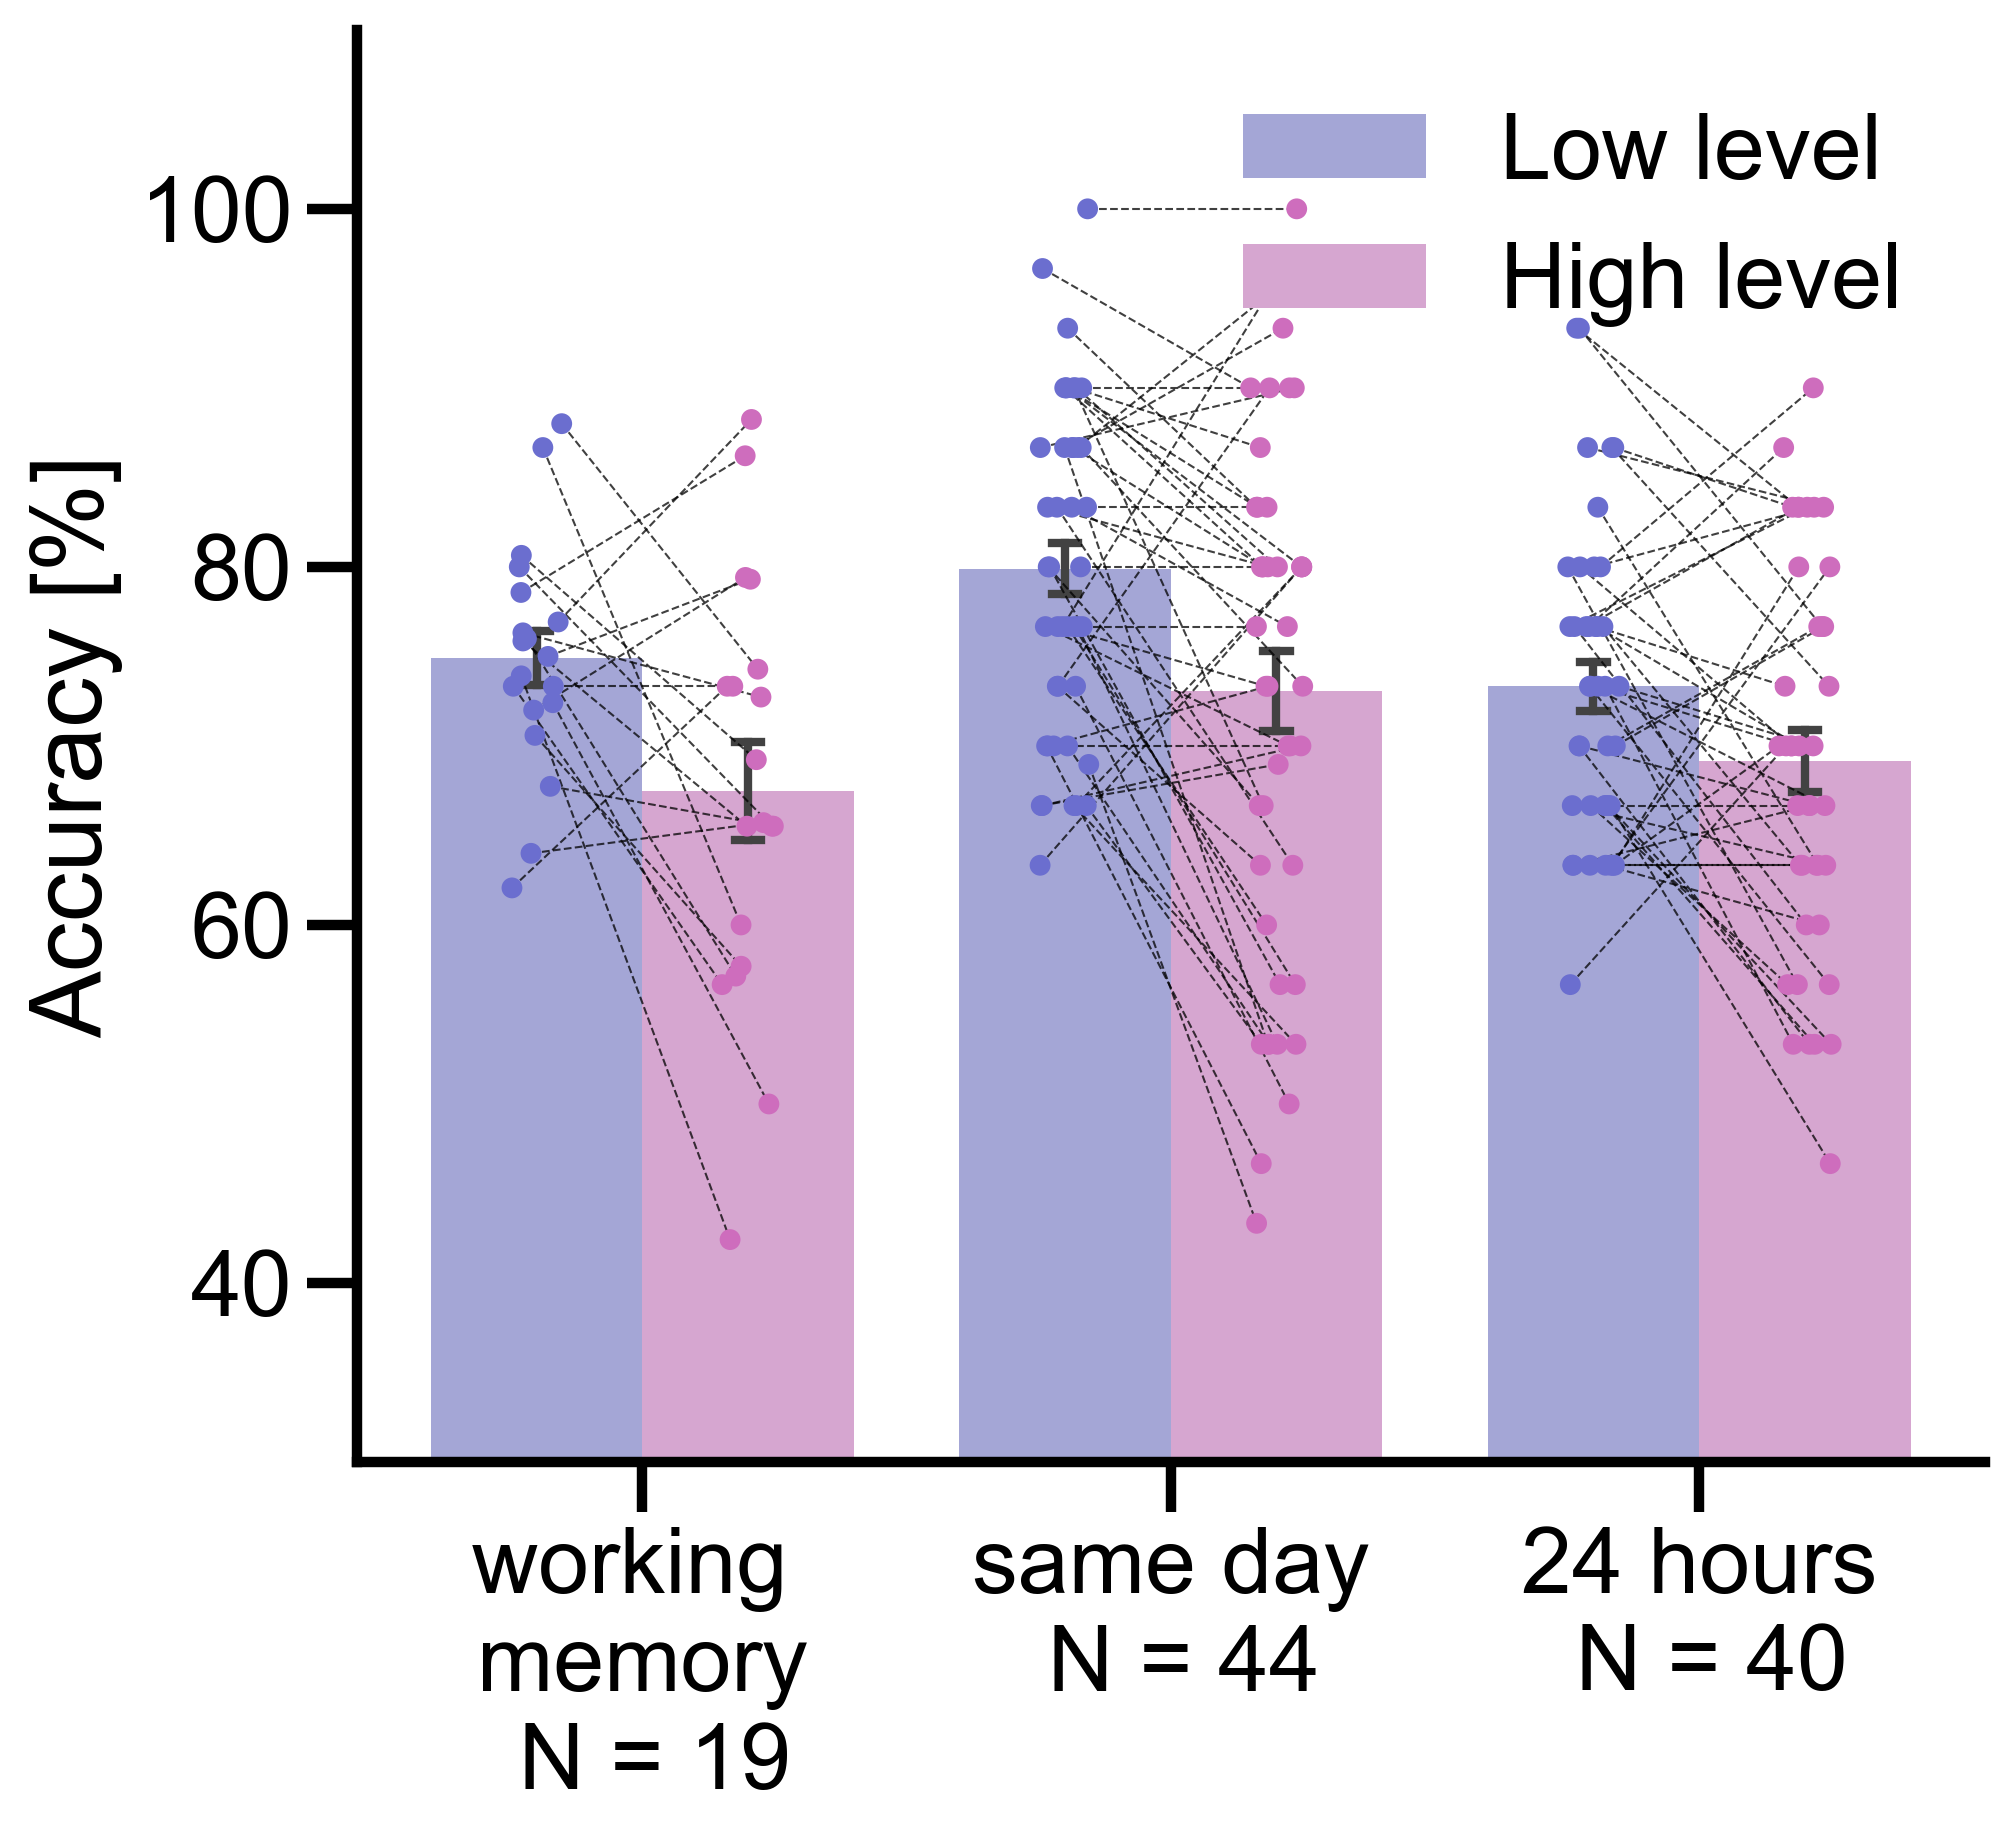

In [601]:
#code for figures:
my_order = ['low_level_accuracy','high_level_accuracy']

if accuracy_df['value'].mean()<1:
    accuracy_df['value']=accuracy_df['value']*100

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(7,6.2),gridspec_kw = {'wspace':0.2, 'hspace':0})

bar = sns.barplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,palette=[sns.color_palette()[3],sns.color_palette()[-1]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'],errorbar='se', capsize=.05,errwidth=2)
stripplot=sns.stripplot(data =accuracy_df, x='time_gap',y='value',hue='layer',ax=axes,dodge=True,palette=[sns.color_palette()[2],sns.color_palette()[-2]],hue_order=my_order,order=['working_memory','pilot_same_day','pilot_24_hours'])

# Hide the right and top spines
axes.spines[['right', 'top']].set_visible(False)

# axes[0].set_xticklabels(labels=['pilot_same_day','pilot_24_hours','pilot_one_week'],rotation=30)
axes.set_xlabel('')
axes.set_xticklabels(labels=[f'working \nmemory\n N = {n_working_memory}',f'same day\n N = {n_same_day}',f'24 hours\n N = {n_24_hours}'])
# Rotating X-axis labels
#plt.xticks(rotation = -45)
handles, labels = axes.get_legend_handles_labels()
legend = axes.legend(handles[2:],['Low level','High level'],loc='upper right', facecolor='none', framealpha=0)
# create the legend and set its facecolor and alpha values

# set the alpha value of the legend text
for text in legend.get_texts():
    text.set_alpha(1)


add_connecting_lines_to_stripplot(stripplot,axes)
axes.set_ylabel('Accuracy [%]')
axes.set_ylim([30,110])
fig.patch.set_alpha(0)


fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.svg'))
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.pdf'), transparent=True)
fig.savefig(PATH_TO_EXPERIMENT / ('all_batches_bar_graph_grouped_by_timegap_'+qualification_method+'.png'), transparent=True)


In [602]:
all_directories_paths_long_term_memory = [path.Path(cur_path) for cur_path in all_directories_paths_long_term_memory]
all_directories_paths_working_memory = [path.Path(cur_path) for cur_path in all_directories_paths_working_memory]
all_participants_batch_locations = all_directories_paths_working_memory + all_directories_paths_long_term_memory

# long format long term memroy

In [603]:
#create a long format encoding and test dataframes: 
all_subjects_encoding_long_format_df_long_term=pd.DataFrame()
all_subjects_test_long_format_df_long_term=pd.DataFrame()
for cur_batch in all_directories_paths_long_term_memory:
    cur_sub_encoding_df=pd.read_csv(cur_batch / 'all_subjects_encoding_df.csv')
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_test_df.csv')

    cur_sub_encoding_df['time_gap']=cur_batch.parent.name
    cur_sub_test_df['time_gap']=cur_batch.parent.name

    all_subjects_encoding_long_format_df_long_term=pd.concat([all_subjects_encoding_long_format_df_long_term,cur_sub_encoding_df],axis=0)
    all_subjects_test_long_format_df_long_term=pd.concat([all_subjects_test_long_format_df_long_term,cur_sub_test_df],axis=0)


all_valid_test_df_long_format_long_term=pd.DataFrame()
all_valid_encoding_df_long_format_ling_term=pd.DataFrame()

for cur_sub in all_valid_subjects_non_working_memory.index:
    #some subject names are the full length name to thier csv: if this is the case, change it to take only the amazong worker id: 
    cur_sub_encoding=all_subjects_encoding_long_format_df_long_term[all_subjects_encoding_long_format_df_long_term['subject']==cur_sub]
    cur_sub_test=all_subjects_test_long_format_df_long_term[all_subjects_test_long_format_df_long_term['subject']==cur_sub]
    all_valid_encoding_df_long_format_ling_term=pd.concat([all_valid_encoding_df_long_format_ling_term,cur_sub_encoding],axis=0)
    all_valid_test_df_long_format_long_term=pd.concat([all_valid_test_df_long_format_long_term,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_long_term['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_long_term['time_gap'].value_counts())


only valid participants counts:
time_gap
pilot_same_day    2640
pilot_24_hours    2520
Name: count, dtype: int64
all participants counts:
time_gap
pilot_same_day    5280
pilot_24_hours    4800
Name: count, dtype: int64


# long format working memroy 

In [604]:
#create a long format encoding and test dataframes: 
all_subjects_test_long_format_df_working_memory=pd.DataFrame()
for cur_batch in all_directories_paths_working_memory:
    
    cur_sub_test_df=pd.read_csv(cur_batch / 'all_subjects_rating_and_accuracy_df.csv')
    cur_sub_test_df['time_gap']='working_memory'
    all_subjects_test_long_format_df_working_memory=pd.concat([all_subjects_test_long_format_df_working_memory,cur_sub_test_df],axis=0)


all_valid_test_df_long_format_working_memory=pd.DataFrame()

for cur_sub in all_valid_subjects_working_memory.index:

    cur_sub_test=all_subjects_test_long_format_df_working_memory[all_subjects_test_long_format_df_working_memory['subject']==cur_sub]
    all_valid_test_df_long_format_working_memory=pd.concat([all_valid_test_df_long_format_working_memory,cur_sub_test],axis=0)

print('only valid participants counts:')
print(all_valid_test_df_long_format_working_memory['time_gap'].value_counts())
print('all participants counts:')
print(all_subjects_test_long_format_df_working_memory['time_gap'].value_counts())


only valid participants counts:
time_gap
working_memory    1260
Name: count, dtype: int64
all participants counts:
time_gap
working_memory    3960
Name: count, dtype: int64


In [605]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct'] == all_subjects_test_long_format_df_working_memory['test_key_resp.keys'] 

In [606]:
all_subjects_test_long_format_df_working_memory['correct_numeric'] = all_subjects_test_long_format_df_working_memory['correct_numeric'].apply(lambda x: int(x))

## add the selected dist,target and category columns 

In [607]:
targets = []
distractors = []
for row in all_subjects_test_long_format_df_long_term.iterrows():
    correct = row[1]['correct']
    if correct == 'left':
        target = row[1]['image1']
        distractor = row[1]['image2']
    else: 
        target = row[1]['image2']
        distractor = row[1]['image1']
    
    targets.append(target)
    distractors.append(distractor)


all_subjects_test_long_format_df_long_term['target'] = targets 
all_subjects_test_long_format_df_long_term['selected_dist'] = distractors

In [608]:
all_subjects_test_long_format_df_long_term['category'] = all_subjects_test_long_format_df_long_term['target'].apply(lambda x: x.split('_')[0])

In [609]:
new_cols = {'bar_2.response':'slider_part2.response',
            'layer':'distractor_level',
            'test_test_response.keys':'test_key_resp.keys',
            
            'test_test_response.rt':'test_key_resp.rt',
            'test_test_response.corr': 'correct_numeric',
            
}

all_subjects_test_long_format_df_long_term.rename(columns=new_cols,inplace=True)

In [610]:
df = pd.concat([all_subjects_test_long_format_df_long_term,all_subjects_test_long_format_df_working_memory])
print(df)

      Unnamed: 0  distractor_level correct test_key_resp.keys  correct_numeric  test_key_resp.rt  trials_2.thisRepN  trials_2.thisTrialN  trials_2.thisN  trials_2.thisIndex  trials_2.ran               image1               image2  slider_part2.response         subject        time_gap               target        selected_dist    category          workID   Age  Gender       background_0      background_1         background_2         background_3        background_4        background_5  target_index  slider_part2.rt
0              0               1.0   right              right              1.0            5.9214                0.0                  0.0             0.0                 0.0           1.0      highway_122.jpg      highway_209.jpg               8.000000  A17K1CHOI773VZ  pilot_same_day      highway_209.jpg      highway_122.jpg     highway             NaN   NaN     NaN                NaN               NaN                  NaN                  NaN                 NaN                

In [611]:
#here we do some statistics: mixed effects (1 between (time gap - 3 levels) and 1 within factors (layer representation - 3 levels)) and some assumption checks
import pingouin as pg

#check for sphercity assumption" 
print('\n---sphericity assumption----------')
print(pg.sphericity(data=accuracy_df, dv='value', subject='worker_ID', within='layer')[-1])

#homoscedasticity
print('\n---homoscedasticity assumption---')
for layer_val in accuracy_df['layer'].unique():
    print(f'layer: {layer_val}:')
    print(pg.homoscedasticity(accuracy_df[accuracy_df['layer']==layer_val], dv='value', group='time_gap'))



#assumption of normality: 
print('\n-----normality assumption-------')
accuracy_df['factor_comb']=accuracy_df["layer"] + '_'+accuracy_df["time_gap"]
print(pg.normality(accuracy_df, dv='value', group='factor_comb'))


print('\n---------anova results----------')

print(pg.mixed_anova(dv='value', between='time_gap', within='layer', subject='worker_ID', data=accuracy_df))



---sphericity assumption----------
1.0

---homoscedasticity assumption---
layer: low_level_accuracy:
               W      pval  equal_var
levene  3.037058  0.052424       True
layer: high_level_accuracy:
               W      pval  equal_var
levene  2.282032  0.107369       True

-----normality assumption-------
                                           W      pval  normal
factor_comb                                                   
low_level_accuracy_pilot_same_day   0.955619  0.089200    True
low_level_accuracy_pilot_24_hours   0.951926  0.088344    True
low_level_accuracy_working_memory   0.966965  0.714548    True
high_level_accuracy_pilot_same_day  0.964448  0.190466    True
high_level_accuracy_pilot_24_hours  0.965178  0.250670    True
high_level_accuracy_working_memory  0.979958  0.941858    True

---------anova results----------
        Source           SS  DF1  DF2           MS          F     p-unc       np2  eps
0     time_gap  1393.330387    2  100   696.665193   4.0722